In [9]:
# Imports and Definitions
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Constants

# Define the Rabi oscillation function with damping
def Rabi(t, A, omega, T2, phi, C):
    """
    Rabi oscillation with damping.
    t: Time (independent variable)
    A: Amplitude of oscillation
    omega: Angular frequency of oscillation
    gamma: Damping factor
    phi: Phase shift
    C: Constant offset
    """
    return A * np.exp(-t/T2) * np.cos(omega * t + phi) + C

def Rabi_rate(Omega0, Delta):
    """
    Calculate the detuning based on the Rabi frequency and the detuning parameter.
    Omega0: Rabi frequency
    Delta: Detuning parameter
    """
    return np.sqrt(Omega0**2 + Delta**2)

def Rabi_amp(A0, Omega0, Delta):
    """
    Calculate the amplitude based on the initial amplitude.
    A0: Initial amplitude
    """
    return A0 * Omega0**2/Rabi_rate(Omega0, Delta)**2

def mhz_to_rad_ns(frequency_mhz):
    """
    Convert frequency from MHz to angular frequency in rad/ns.
    frequency_mhz: Frequency in MHz
    Returns: Angular frequency in rad/ns
    """
    return 2 * np.pi * frequency_mhz / 1e3

def rad_ns_to_mhz(omega):
    """
    Convert angular frequency from rad/ns to MHz.
    omega: Angular frequency in rad/ns
    Returns: Frequency in MHz
    """
    return omega / (2 * np.pi) * 1e3


In [13]:
# Create Datasets
tau=np.linspace(0, 80, 161)  # ns
df=np.linspace(-60,60,201) # MHz
Omega0=0.2 # ns/rad
Delta=mhz_to_rad_ns(df) # rad/ns
A0=24 # a.u. 
phi=0.0 # rad
T2=40 # ns

I=np.zeros((len(tau), len(df)))
for i, t in enumerate(tau):
    for j, d in enumerate(Delta):
        A=Rabi_amp(A0, Omega0, d)
        Omega=Rabi_rate(Omega0, d)
        I[i,j] = Rabi(t, A, Omega,T2, phi, 0)




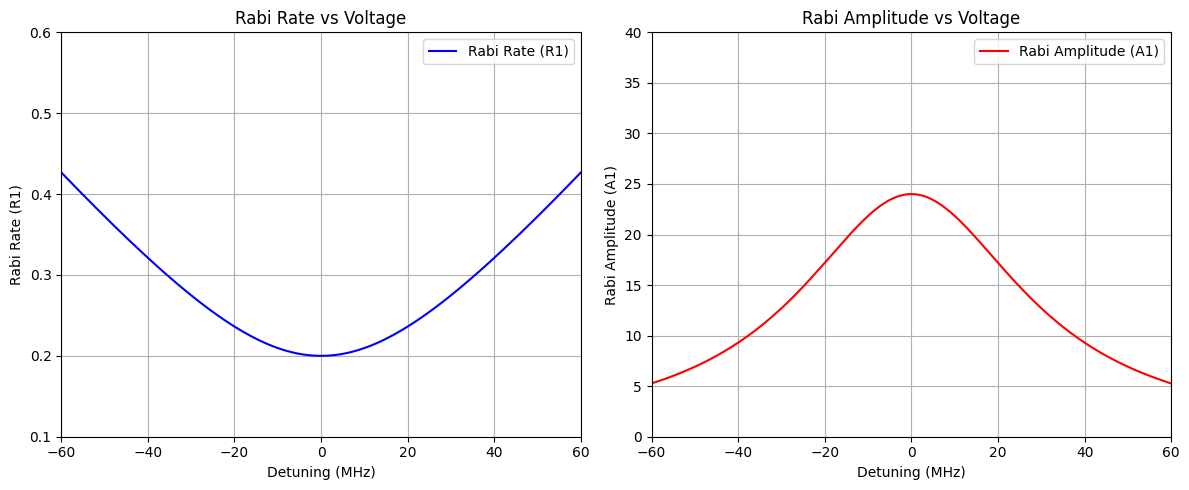

In [17]:
# Test functions
A1=Rabi_amp(A0, Omega0, Delta)
R1=Rabi_rate(Omega0, Delta)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot R1
axs[0].plot(df, R1, label='Rabi Rate (R1)', color='blue')
axs[0].set_xlabel('Detuning (MHz)')
axs[0].set_ylabel('Rabi Rate (R1)')
axs[0].set_title('Rabi Rate vs Voltage')
axs[0].legend()
axs[0].grid()
axs[0].set_ylim(0.1, 0.6)
axs[0].set_xlim(-60, 60)

# Plot A1
axs[1].plot(df, A1, label='Rabi Amplitude (A1)', color='red')
axs[1].set_xlabel('Detuning (MHz)')
axs[1].set_ylabel('Rabi Amplitude (A1)')
axs[1].set_title('Rabi Amplitude vs Voltage')
axs[1].legend()
axs[1].grid()
axs[1].set_ylim(0, 40)
axs[1].set_xlim(-60, 60)

plt.tight_layout()
plt.show()

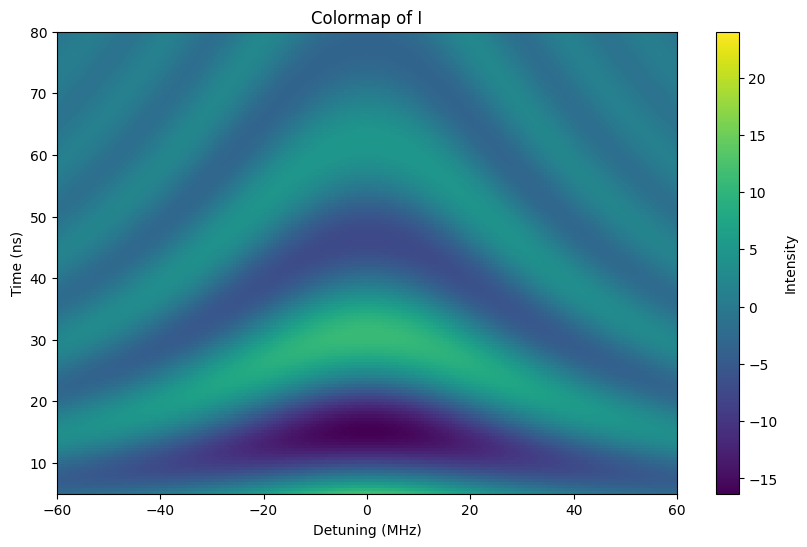

In [19]:
plt.figure(figsize=(10, 6))
plt.imshow(I, extent=[df[0], df[-1], tau[0], tau[-1]], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Intensity')
plt.set_cmap('viridis')
plt.xlabel('Detuning (MHz)')
plt.ylabel('Time (ns)')
plt.title('Colormap of I')
plt.ylim(5, 80)
plt.show()